<main style="font-family: TeX Gyre Termes; font-size: 1.2rem">

### MEX #4 - Geyzson Kristoffer
SN:2023-21036

https://uvle.upd.edu.ph/mod/assign/view.php?id=542086

<hr>

question about can you use this to cluster related words or something

In [15]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import random

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [9]:
X, y = load_digits(return_X_y=True)

In [10]:
# random.seed(0)

# rows, cols = 4, 8
# fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
#                        subplot_kw=dict(xticks=[], yticks=[]))

# for row in range(rows):
#     for col in range(cols):
#         n = np.random.randint(1796)+1 
#         im = ax[row, col].imshow(X[n].reshape((8,8)), cmap=plt.cm.binary)
#         ax[row, col].set_title(y[n])
#         im.set_clim(0, 16)

# plt.show()

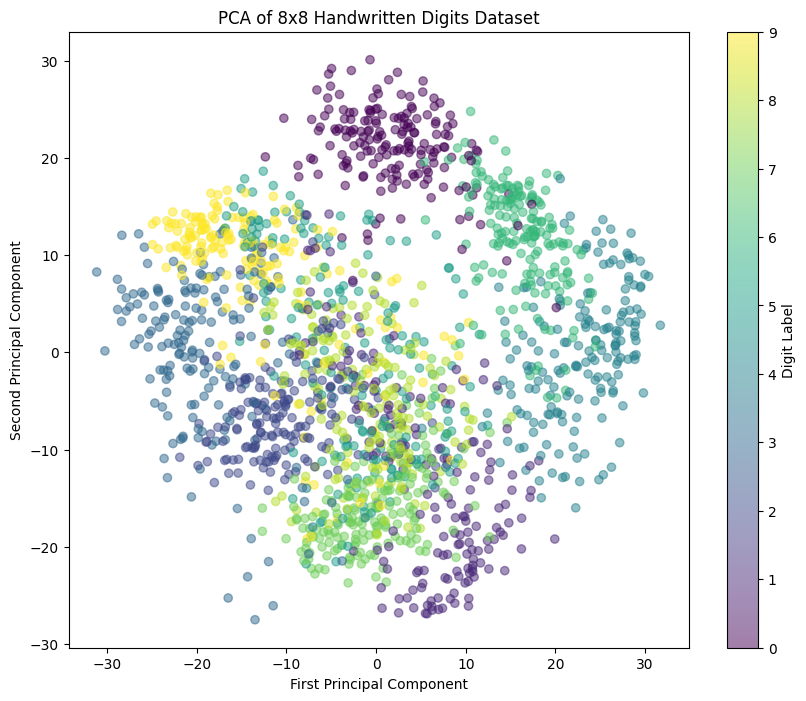

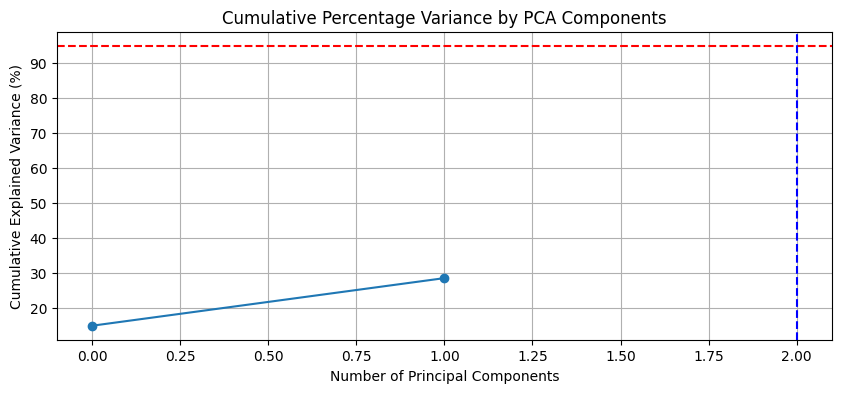

28.50936482369785

In [11]:
# # Perform PCA to reduce the dataset to 2 dimensions
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# # Visualize the 2-D projection
# plt.figure(figsize=(10, 8))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
# plt.colorbar(label='Digit Label')
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.title('PCA of 8x8 Handwritten Digits Dataset')
# plt.show()

# # Compute and plot the cumulative percentage variance (CPV)
# cpv = np.cumsum(pca.explained_variance_ratio_) * 100

# plt.figure(figsize=(10, 4))
# plt.plot(cpv, marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance (%)')
# plt.title('Cumulative Percentage Variance by PCA Components')
# plt.axhline(y=95, color='r', linestyle='--')
# plt.axvline(x=2, color='b', linestyle='--')
# plt.grid(True)
# plt.show()

# # CPV at 2 principal components
# cpv_at_2 = cpv[1]
# cpv_at_2

Explained variance ratio:    [0.12033916 0.09561054]
Cumulative percent variance: [12.0339161  21.59497049]


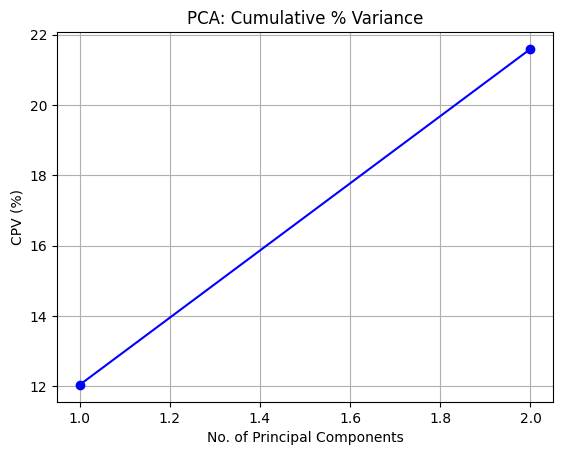

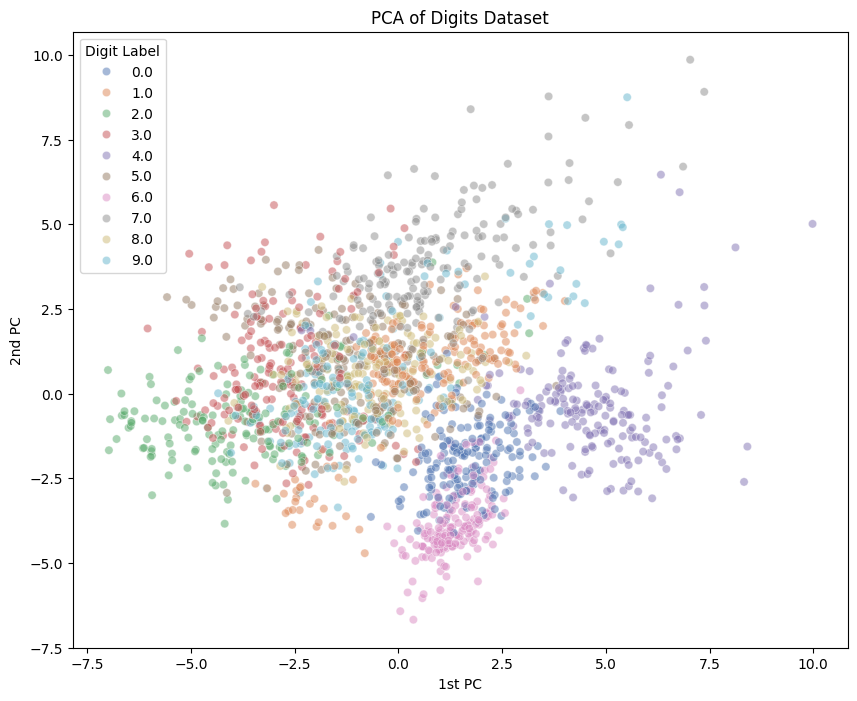

In [25]:
# Load the digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Create a pipeline for standard scaling and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_digits = pipeline.fit_transform(X_digits)

# Explained variance ratio
var_digits = pipeline.named_steps['pca'].explained_variance_ratio_
print("Explained variance ratio:    %s" % str(var_digits))
print("Cumulative percent variance: %s" % str(np.cumsum(var_digits)*100))


cpv = np.cumsum(var_digits)*100
plt.plot(np.arange(cpv.size)+1,cpv,'bo-')
plt.title('PCA: Cumulative % Variance')
plt.xlabel('No. of Principal Components')
plt.ylabel('CPV (%)')
plt.grid()
plt.show()

# Create a DataFrame for plotting
df_digits = pd.DataFrame(data=np.c_[X_pca_digits, y_digits], 
                         columns=['1st PC', '2nd PC', 'Digit Label'])

# Plot the first 2 principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_digits, x="1st PC", y="2nd PC", hue="Digit Label", palette="deep", alpha=0.5)
plt.title('PCA of Digits Dataset')
plt.show()


In [14]:
# Adjusting the CPV plot to correctly label the x-axis starting from 1 for the first principal component

plt.figure(figsize=(10, 4))
plt.plot([1, 2], cpv_2pc, marker='o')  # Adjusting the x-axis to start from 1
plt.xticks([1, 2])  # Setting x-axis ticks to show 1 and 2 for the principal components
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Percentage Variance by First 2 PCA Components')
plt.grid(True)
plt.show()

# Clarifying the PCA scatter plot axis labels
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_2pc_digits, x="1st PC", y="2nd PC", hue="Digit Label", palette="viridis", alpha=0.5)
plt.xlabel('Score on First Principal Component')
plt.ylabel('Score on Second Principal Component')
plt.title('PCA (2 Components) of Digits Dataset')
plt.show()


NameError: name 'cpv_2pc' is not defined

<Figure size 1000x400 with 0 Axes>

In [ ]:
from sklearn.decomposition import PCA
# Perform Standard Scaling then PCA
pca = make_pipeline(StandardScaler(), PCA())
X_pca = pca.fit(X).transform(X)
var = pca[1].explained_variance_ratio_
print("Explained variance ratio:    %s" % str(var))
print("Cumulative percent variance: %s" % str(np.cumsum(var)*100))

# Plot the first 2 principal components
df = pd.DataFrame(data=np.c_[X_pca, iris.frame["Species"]],
                  columns=['1st PC','2nd PC','3rd PC','4th PC','Species'])
sns.jointplot(data=df, x="1st PC", y="2nd PC", hue="Species")
plt.show()

Explained variance ratio:    [1.20339161e-01 9.56105440e-02 8.44441489e-02 6.49840791e-02
 4.86015488e-02 4.21411987e-02 3.94208280e-02 3.38938092e-02
 2.99822101e-02 2.93200255e-02 2.78180546e-02 2.57705509e-02
 2.27530332e-02 2.22717974e-02 2.16522943e-02 1.91416661e-02
 1.77554709e-02 1.63806927e-02 1.59646017e-02 1.48919119e-02
 1.34796957e-02 1.27193137e-02 1.16583735e-02 1.05764660e-02
 9.75315947e-03 9.44558990e-03 8.63013827e-03 8.36642854e-03
 7.97693248e-03 7.46471371e-03 7.25582151e-03 6.91911245e-03
 6.53908536e-03 6.40792574e-03 5.91384112e-03 5.71162405e-03
 5.23636803e-03 4.81807586e-03 4.53719260e-03 4.23162753e-03
 4.06053070e-03 3.97084808e-03 3.56493303e-03 3.40787181e-03
 3.27835335e-03 3.11032007e-03 2.88575294e-03 2.76489264e-03
 2.59174941e-03 2.34483006e-03 2.18256858e-03 2.03597635e-03
 1.95512426e-03 1.83318499e-03 1.67946387e-03 1.61236062e-03
 1.47762694e-03 1.35118411e-03 1.25100742e-03 1.03695730e-03
 8.25350945e-04 3.23475858e-33 6.39352227e-34 6.29595280

NameError: name 'iris' is not defined